In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Arial',
          'font.size': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
          'savefig.dpi': 300
         }
plt.rcParams.update(config)

# Read mf6pqc results pH Cl Mg Ca Calcite Dolomite
mf6pqc_data = np.load("./output/results.npy")
mf6pqc_data = mf6pqc_data[-1].reshape(6, 50)

# Read pht3d results [Ca Mg Cl pH Calcite Dolomite]
pht3d_data = np.load("./input_data/PHT3D_results.npy")

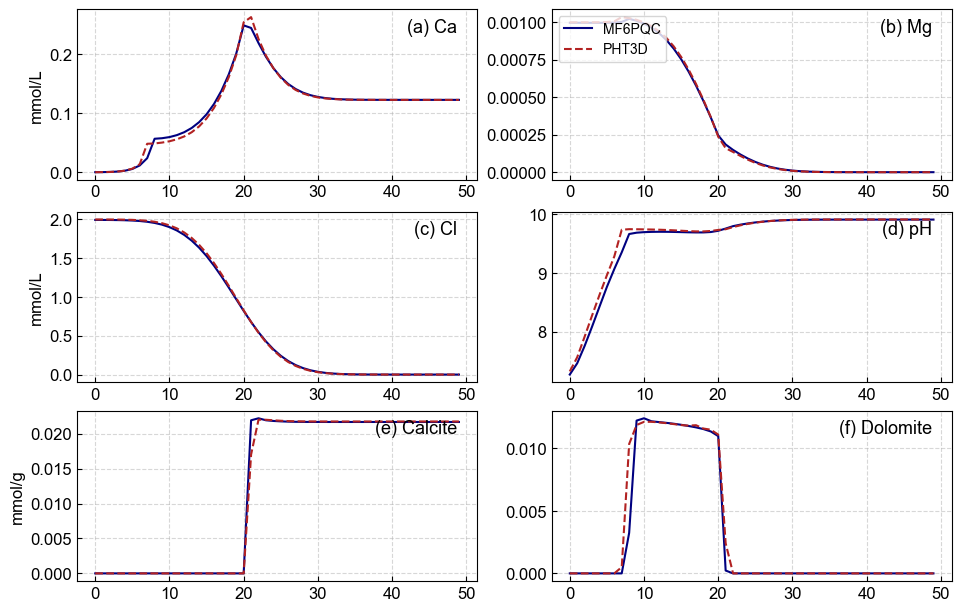

In [2]:
import matplotlib.pyplot as plt

labels = ['Ca', 'Mg', 'Cl', 'pH', 'Calcite', 'Dolomite']
letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

data_funcs = [
    lambda mf, pht: (mf[3, :] * 1000, pht[0, :] * 1000),
    lambda mf, pht: (mf[2, :], pht[1, :]),
    lambda mf, pht: (mf[1, :] * 1000, pht[2, :] * 1000),
    lambda mf, pht: (mf[0, :], pht[3, :]),
    lambda mf, pht: (mf[4, :] * 1000 / 1.8, pht[4, :] * 1000 / 1.8),
    lambda mf, pht: (mf[5, :] * 1000 / 1.8, pht[5, :] * 1000 / 1.8),
]

timeseries = range(mf6pqc_data.shape[1])  # Assuming time dimension

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(9.5, 6), constrained_layout=True)
axes = axes.flatten()

for idx, ax in enumerate(axes):
    y1, y2 = data_funcs[idx](mf6pqc_data, pht3d_data)
    ax.plot(timeseries, y1, label='MF6PQC', color='#000080')
    ax.plot(timeseries, y2, linestyle='--', label='PHT3D', color='#b22222')
    ax.grid(visible=True, which='major', axis='both', alpha=0.5, linestyle='--')
    ax.set_axisbelow(True)
    if idx % 2 == 0:
        ax.set_ylabel('mmol/L' if idx < 4 else 'mmol/g')
    ax.text(
        0.95, 0.95,
        f"{letters[idx]} {labels[idx]}",
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=13,
        # fontweight='bold'
    )
    if idx == 1:
        ax.legend(loc='upper left', fontsize=10)

plt.show()